# Statistical Analysis of SARS-CoV-2 (2019)
## Andrew Richard, Clay Richard, and Dakota Sanders -- March 13, 2020

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
try:
    df = pd.read_csv(
        'COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv', index_col=0)
except:
    print("Dataset not available, please clone repo listed in README")
    exit()

# get current date
# datetime_object = datetime.now()
df.set_index("Country/Region", inplace=True)
usadates = df.iloc[42, 3:46].reset_index()
usax = usadates['index']
usay = usadates["United States of America"]
fig = plt.figure()
plt.subplot(211)
plt.title('United States Growth')
plt.scatter(usax,usay)
plt.xticks(np.arange(0,len(usax),step=7), rotation=45)
plt.show()

globaldates = df.iloc[0, 3:46].reset_index()
globalx = globaldates['index']
globaly = globaldates["Globally"]
plt.subplot(212)
plt.title('Global Growth')
plt.scatter(globalx,globaly)
plt.xticks(np.arange(0,len(globalx),step=7), rotation=45)
plt.show()

Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

## Attempt at a heatmap
The goal is to try to use geopandas to generate a heatmap for each day from data found in the daily reports.
Note: You'll need to install `geopandas` and `descartes` using pip.

In [100]:
import datetime
import geopandas as gpd

time_format = "COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/%m-%d-%Y.csv"
current_date = datetime.date(2020,3,1)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<Figure size 1440x1440 with 0 Axes>

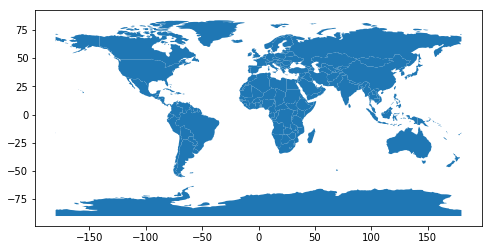

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Change figure size (i think this is right)
plt.figure(figsize=(20,20))
world.plot()

In [102]:
# Now read in data
import pandas as pd

spatial_df = pd.read_csv(current_date.strftime(time_format))
spatial_df_new = pd.DataFrame({"Location": spatial_df['Province/State'], "Confirmed": spatial_df["Confirmed"], "Lat": spatial_df["Latitude"], "Long": spatial_df["Longitude"]})
spatial_df_new.Location.fillna(spatial_df["Country/Region"], inplace=True)
spatial_df_new.set_index("Location")

,Confirmed,Lat,Long
Location,,,
Hubei,66907,30.9756,112.2707
South Korea,3736,36.0000,128.0000
Italy,1694,43.0000,12.0000
Guangdong,1349,23.3417,113.4244
Henan,1272,33.8820,113.6140
Zhejiang,1205,29.1832,120.0934
Hunan,1018,27.6104,111.7088
Anhui,990,31.8257,117.2264
Iran,978,32.0000,53.0000


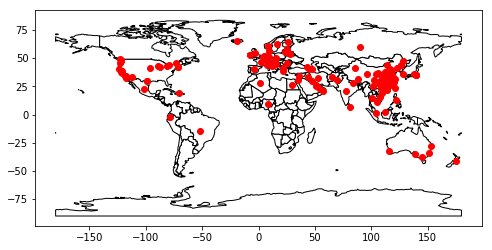

In [103]:
# Now to convert to valid GIS data? I have no clue what this looks like.
geo_points = gpd.GeoDataFrame(spatial_df_new, geometry=gpd.points_from_xy(spatial_df_new["Long"], spatial_df_new["Lat"]))
ax = world.plot(color='white', edgecolor='black')
geo_points.plot(ax=ax, color='red')
plt.show()

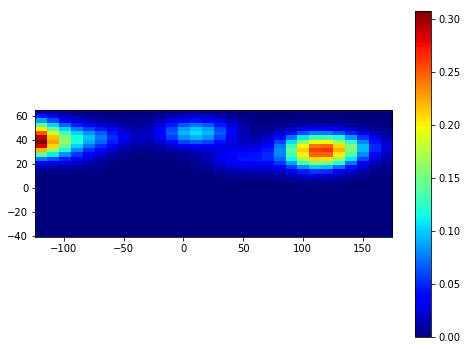

In [104]:
# Copied from https://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434
from scipy import ndimage

def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

heatmap(geo_points, bins=30, smoothing=2)
# This is worth playing more with, but I wanna try something else first

In [105]:
# What if we use folium?
import folium
from folium.plugins import HeatMap

max_amount = float(spatial_df_new['Confirmed'].max())

hmap = folium.Map(location=[42.5, -75.5], zoom_start=3, )
hm_wide = HeatMap( list(zip(spatial_df_new["Lat"], spatial_df_new["Long"], spatial_df_new["Confirmed"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=20, blur=15, 
                   max_zoom=1, 
                 )
hmap.add_child(hm_wide)